In [2]:
# carga de paquetes
import sys
sys.path.append("../scripts/")
from funciones_paralectura import carga_de_datos, transformar_datos
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import pandas as pd


In [3]:
# carga de caminata aleatoria
documento = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW5.mat'
documento_2 = '../../Battery_Uniform_Distribution_Discharge_Room_Temp_DataSet_2Post/data/Matlab/RW4.mat'
comentarios = ['discharge (random walk)',
               'rest (random walk)',
               'rest post random walk discharge']
comentario_final = ['charge (after random walk discharge)']
t, v, c, temp, T = carga_de_datos(documento, comentarios, comentario_final, nofinal=False)
t_2, v_2, c_2, temp_2, T_2 = carga_de_datos(documento_2, comentarios, comentario_final, nofinal=False)

carga de datos de bateria RW5.mat
tiempo len: 743
voltage len: 743
current len: 743
temperatura len: 743
Tiempo absoluto len: 743
carga de datos de bateria RW4.mat
tiempo len: 728
voltage len: 728
current len: 728
temperatura len: 728
Tiempo absoluto len: 728


In [4]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t, v, c, temp, T)


saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}

df = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])

df['voltaje'] = [x for x in arr_voltaje_salto]
df['corriente'] = [x for x in arr_corriente_salto]
df['temperatura'] = [x for x in arr_temperatura_salto]
df['tiempo'] = [x for x in arr_tiempo_salto]
df['temp_ini'] = [x[0] for x in df['temperatura']]

df = df.reset_index()
print(len(df))
# df = df.iloc[np.where(df['energia'] > 100)]
# print(len(df))
df.head()


ciclo 741     4931


,index,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini
0,0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039
1,1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093
2,2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748
3,3,1,8200.072656,2.504,1.2520,"[3.733, 3.846, 3.854, 3.657, 3.652, 3.65, 3.64...","[1.5, 0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.499, 2...","[27.24822, 27.24822, 27.23267, 27.23267, 27.23...","[275785.35, 275785.36, 275785.81, 275785.85, 2...",27.24822
4,4,1,10884.859898,0.504,0.2520,"[3.543, 3.731, 3.747, 3.708, 3.711, 3.715, 3.7...","[2.5, 0.0, 0.0, 0.504, 0.5, 0.5, 0.5, 0.5, 0.5...","[28.07212, 28.07212, 28.07212, 28.07212, 28.07...","[276085.81, 276085.82, 276086.28, 276086.33, 2...",28.07212


2517


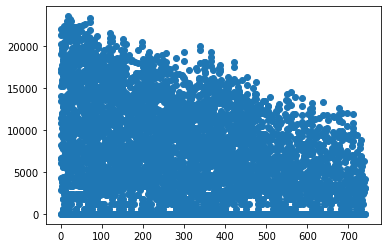

In [5]:
plt.scatter(df['ciclo'], df['energia'])

df = df.iloc[np.where(df['energia'] < 7000)]
print(len(df))
df = df.reset_index()


In [6]:
[arr_dif_salto_c,
 arr_pot_salto,
 arr_centro_salto_c,
 arr_ciclo_salto,
 arr_voltaje_salto,
 arr_corriente_salto,
 arr_tiempo_salto,
 arr_temperatura_salto] = transformar_datos(t_2, v_2, c_2, temp_2, T_2)

saltos = {'ciclo': arr_ciclo_salto,
          'energia': arr_pot_salto,
          'magnitud': arr_dif_salto_c,
          'media': arr_centro_salto_c}
df_2 = pd.DataFrame(saltos, columns=['ciclo', 'energia', 'magnitud', 'media'])
df_2['voltaje'] = [x for x in arr_voltaje_salto]
df_2['corriente'] = [x for x in arr_corriente_salto]
df_2['temperatura'] = [x for x in arr_temperatura_salto]
df_2['tiempo'] = [x for x in arr_tiempo_salto]
df_2['temp_ini'] = [x[0] for x in df_2['temperatura']]


df_2 = df_2.reset_index()
print(len(df))
# df_2 = df_2.iloc[np.where(df_2['energia'] > 100)]
# print(len(df_2))
df_2 = df_2.iloc[np.where(df_2['energia'] < 7000)]
print(len(df_2))
df_2.head()
df_2 = df_2.reset_index()


ciclo 726     2517
2457


In [7]:
# extraccion de caracteristicas
from preparacion_entrenamiento import *
from extraccion_caracteristicas import *

In [8]:
# obtener features

#RW3
df["ene_total"] = energia_total(df["energia"],df["ciclo"])

mag = Mg_rel(df['magnitud'])
df["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df["Mediana_rel"] = mag[1] #mediana relativa
df["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df["F1"] = [np.mean(x[:1]) for x in primera_derivada(df["voltaje"])] #primera derivada
df["F1"] = primera_derivada(df["voltaje"],df["tiempo"])
#df["F2"] = segunda_derivada(df["voltaje"]) #segunda derivada
df["F2"] = segunda_derivada(df["voltaje"],df["tiempo"]) 
df["F3"] = deltaT(df["temp_ini"],df["magnitud"])  #Diferencia de temperatura
df["F4"] = primera_derivada_RC(df["voltaje"])  # primera derivada efecto capacitivo
df["F5"] = segunda_derivada_RC(df["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df["voltaje"],df["tiempo"],df["ciclo"])
df["F6"] = RC_test[0]  # circuito RC
df["F7"] = potencia_instantanea_salto(df['voltaje'], df['corriente'], limite=1) #Potencia instantanea
df["F8"] = np.round(df["F7"].values/df["Mag_rel"].values,3)
df["F9"] =  np.round(df["F7"].values/df["Mag_rel_abs"].values,3)
#RW5
df_2["ene_total"] = energia_total(df_2["energia"],df_2["ciclo"])

mag = Mg_rel(df_2['magnitud'])
df_2["Mag_rel"] = mag[0] #magnitud relativa a la anterior
df_2["Mediana_rel"] = mag[1] #mediana relativa
df_2["Mag_rel_abs"] = np.absolute(mag[0]) #magnitud relativa a la anterior
df_2["Mediana_rel_abs"] = np.absolute(mag[1]) #mediana relativa

#df_2["F1"] = [np.mean(x[:1]) for x in primera_derivada(df_2["voltaje"])]
df_2["F1"] = primera_derivada(df_2["voltaje"],df_2["tiempo"])
#df_2["F2"] = segunda_derivada(df_2["voltaje"]) #segunda derivada
df_2["F2"] = segunda_derivada(df_2["voltaje"],df_2["tiempo"]) 
df_2["F3"] = deltaT(df_2["temp_ini"],df_2["magnitud"])
df_2["F4"] = primera_derivada_RC(df_2["voltaje"])  # primera derivada efecto capacitivo
df_2["F5"] = segunda_derivada_RC(df_2["voltaje"])  # segunda derivada efecto capacitivo
RC_test = RC(df_2["voltaje"],df_2["tiempo"],df_2["ciclo"])
df_2["F6"] = RC_test[0]  # circuito RC
df_2["F7"] = potencia_instantanea_salto(df_2['voltaje'], df_2['corriente'], limite=1) #Potencia instantanea
df_2["F8"] = np.round(df_2["F7"].values/df_2["Mag_rel"].values,3)
df_2["F9"] = np.round(df_2["F7"].values/df_2["Mag_rel_abs"].values,3)
#Cambio de labels para etiquetar

sep = 8
df["clase"] = ChangeLabel(df['ciclo'],sep)
df_2["clase"] = ChangeLabel(df_2["ciclo"],sep)

#print(df["F7"].values/df["Mag_rel"].values)
#df.values[1393,:]


C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\fromnumeric.py:3118: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
C:\Users\cbaez\Anaconda3\lib\site-packages\numpy\core\_methods.py:85: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:22: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:23: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:43: RuntimeWarning: divide by zero encountered in true_divide
C:\Users\cbaez\Anaconda3\lib\site-packages\ipykernel_launcher.py:44: RuntimeWarning: divide by zero encountered in true_divide


In [9]:
for i, col in enumerate(df.columns):
    print('{} columna {}'.format(i, col))

0 columna level_0
1 columna index
2 columna ciclo
3 columna energia
4 columna magnitud
5 columna media
6 columna voltaje
7 columna corriente
8 columna temperatura
9 columna tiempo
10 columna temp_ini
11 columna ene_total
12 columna Mag_rel
13 columna Mediana_rel
14 columna Mag_rel_abs
15 columna Mediana_rel_abs
16 columna F1
17 columna F2
18 columna F3
19 columna F4
20 columna F5
21 columna F6
22 columna F7
23 columna F8
24 columna F9
25 columna clase


A continuación, se toman un arreglo al azar de ciclos repartidos uniformemente como entrenamiento, correspondiente a una proporción del 70% de los ciclos, el resto corresponde a datos de testeo.

741
368.4054054054054
372.1098265895954
741


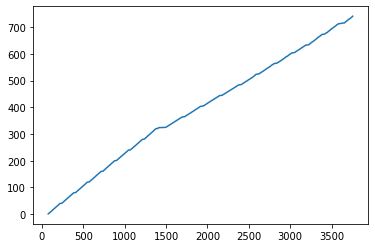

In [10]:
tiempo_abs = []
ciclos = []
for index, row in df.iterrows():
    tiempo_abs.append(np.min(row.tiempo) / 3600)
    ciclos.append(row.ciclo)

plt.plot(tiempo_abs, ciclos)

ciclos_index = np.unique(df.ciclo)

# tomar una seleccion aleatoria uniforme de ciclos
train_ciclos_index = np.random.choice(ciclos_index,
                                      size=round(len(ciclos_index) * 0.7),
                                      replace=False)
train_ciclos_index = np.sort(train_ciclos_index)

mask = np.ones(len(ciclos_index), dtype=bool)
# print(ciclos_index)
# print(train_ciclos_index)
mask[train_ciclos_index - 1] = False
test_ciclos_index = ciclos_index[mask]
test_ciclos_index = np.sort(test_ciclos_index)

print(len(ciclos_index))
print(np.mean(test_ciclos_index))
print(np.mean(train_ciclos_index))
print(len(test_ciclos_index) + len(train_ciclos_index))

Asociar el ciclo con un estado del SOH (un punto en la curva)

carga de datos de bateria RW5.mat
tiempo len: 42
voltage len: 42
current len: 42
temperatura len: 42
Tiempo absoluto len: 42
carga de datos de bateria RW4.mat
tiempo len: 38
voltage len: 38
current len: 38
temperatura len: 38
Tiempo absoluto len: 38


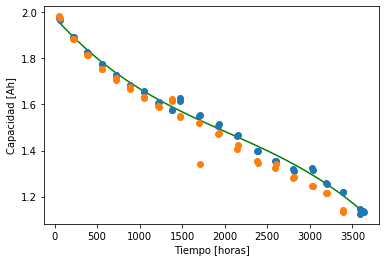

In [11]:
#RW3
lista = [str('reference discharge')]
final = [str('rest post reference discharge')]
[t_descarga, v_descarga, c_descarga,
 temp_descarga, T_descarga] = carga_de_datos(documento, lista, final, nofinal=True)

# integrar la descarga
energia_entregada = []
T = []
for k in t_descarga.keys():
    energia_entregada.append(sum(c_descarga[k]) / 360)
    T.append(np.min(t_descarga[k]) / 3600)

#RW5
lista_2 = [str('reference discharge')]
final_2 = [str('rest post reference discharge')]
[t_descarga_2, v_descarga_2, c_descarga_2,
 temp_descarga_2, T_descarga_2] = carga_de_datos(documento_2, lista_2, final_2, nofinal=True)

# integrar la descarga
energia_entregada_2 = []
T_2 = []
for k in t_descarga_2.keys():
    energia_entregada_2.append(sum(c_descarga_2[k]) / 360)
    T_2.append(np.min(t_descarga[k]) / 3600)

# calculate polynomial
z = np.polyfit(T, energia_entregada, 3)
f = np.poly1d(z)

# calculate new x's and y's
x_new = np.linspace(T[0], T[-1], 50)
y_new = f(x_new)

plt.plot(x_new, y_new, 'g')
plt.plot(T,energia_entregada,'o')
plt.plot(T_2,energia_entregada_2,'o')
plt.ylabel('Capacidad [Ah]')
plt.xlabel('Tiempo [horas]')
plt.show()


Hay que hacer una relación entre los ciclos y el tiempo, luego de eso con el SOH.

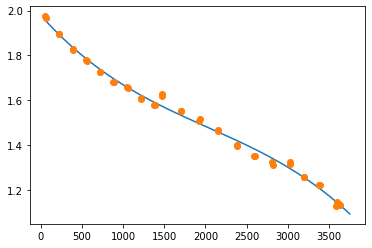

In [12]:
SOH_new = f(tiempo_abs)
plt.plot(tiempo_abs, SOH_new)
plt.plot(T,energia_entregada,'o')

In [13]:
df['SOH'] = SOH_new
df = df.drop(columns=['index', 'level_0'])
df.head()

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,ene_total,...,F2,F3,F4,F5,F6,F7,F8,F9,clase,SOH
0,1,0.614047,4.005,2.0025,"[4.199, 4.199, 3.833, 3.809, 3.801, 3.795, 3.7...","[0.0, 0.0, 4.005, 3.999, 4.0, 3.999, 4.0, 4.0,...","[20.61039, 20.61039, 20.61039, 20.62594, 20.62...","[274884.25, 274884.5, 274884.54, 274885.540000...",20.61039,0.614047,...,8.026756e-07,5.146165,0.000000,0.000000,0.00000,16.816995,4.199,4.199,1,1.948188
1,1,4266.690109,2.007,1.0035,"[3.512, 3.817, 3.842, 3.683, 3.688, 3.693, 3.6...","[4.0, 0.0, 0.0, 2.007, 2.0, 2.0, 2.0, 2.0, 2.0...","[28.18093, 28.18093, 28.18093, 28.18093, 28.21...","[275184.5, 275184.50999999995, 275184.7, 27518...",28.18093,4266.690109,...,5.300000e-06,3.772068,0.000213,-0.000027,70.30368,7.710894,-3.859,3.859,1,1.948155
2,1,6510.697143,1.503,0.7515,"[3.72, 3.868, 3.879, 3.763, 3.762, 3.763, 3.76...","[2.0, 0.0, 0.0, 1.503, 1.5, 1.5, 1.5, 1.5, 1.5...","[28.36748, 28.36748, 28.36748, 28.36748, 28.35...","[275484.7, 275484.71, 275485.35, 275485.39, 27...",28.36748,6510.697143,...,3.866667e-06,0.124118,0.000107,-0.000034,26.98008,5.830137,-11.568,11.568,1,1.948122
3,2,0.397476,2.503,1.2515,"[4.199, 4.199, 3.97, 3.956, 3.952, 3.948, 3.94...","[0.0, 0.0, 2.503, 2.5, 2.499, 2.5, 2.5, 2.5, 2...","[20.17513, 20.17513, 20.17513, 20.17513, 20.15...","[289066.76999999996, 289066.96, 289067.0, 2890...",20.17513,6511.094620,...,4.347826e-07,3.273012,0.000000,0.000000,0.00000,10.510097,10.510,10.510,1,1.946634
4,2,2846.328689,3.001,1.5005,"[3.731, 3.93, 3.957, 3.697, 3.684, 3.682, 3.68...","[2.5, 0.0, 0.0, 3.001, 3.0, 3.0, 3.0, 3.0, 3.0...","[23.20645, 23.20645, 23.20645, 23.20645, 23.20...","[289366.96, 289366.97000000003, 289367.11, 289...",23.20645,9357.025833,...,8.633333e-06,1.010103,0.000000,0.000000,0.00000,11.874957,23.845,23.845,1,1.946601


In [15]:
# tomamos los ciclos de entrenamiento y test del dataframe
df_test = pd.DataFrame()
for idx in np.sort(test_ciclos_index):
    print('\r {}   '.format(idx), end='')
    df_test = pd.concat([df_test, df.iloc[np.where(df.ciclo == idx)]])
df_test = df_test.reset_index()
df_test = df_test.drop(columns='index')
df_test

 738   

,ciclo,energia,magnitud,media,voltaje,corriente,temperatura,tiempo,temp_ini,ene_total,...,F2,F3,F4,F5,F6,F7,F8,F9,clase,SOH
0,10,0.397635,2.504,1.2520,"[4.199, 4.199, 3.97, 3.956, 3.951, 3.948, 3.94...","[0.0, 0.0, 2.504, 2.5, 2.5, 2.5, 2.5, 2.5, 2.5...","[20.2684, 20.2684, 20.2684, 20.2684, 20.2684, ...","[395260.05, 395260.26, 395260.30000000005, 395...",20.26840,5.025946e+04,...,4.682274e-07,1.837616,0.000000,0.000000,0.00000,10.514296,-10.525,10.525,1,1.935119
1,10,2847.502518,3.503,1.7515,"[3.732, 3.933, 3.965, 3.658, 3.642, 3.638, 3.6...","[2.5, 0.0, 0.0, 3.503, 3.5, 3.5, 3.5, 3.5, 3.5...","[23.34636, 23.34636, 23.34636, 23.34636, 23.37...","[395560.26, 395560.27, 395560.98, 395561.02, 3...",23.34636,5.310657e+04,...,1.023333e-05,0.878664,0.000000,0.000000,0.00000,13.889395,13.903,13.903,1,1.935087
2,10,6572.639096,4.004,2.0020,"[3.51, 3.776, 3.796, 3.476, 3.469, 3.467, 3.46...","[3.5, 0.0, 0.0, 4.004, 4.0, 4.0, 4.0, 4.0, 4.0...","[28.27421, 28.27421, 28.27421, 28.27421, 28.28...","[395860.98, 395860.99, 395861.16, 395861.2, 39...",28.27421,5.683170e+04,...,1.063333e-05,1.230732,0.000000,0.000000,0.00000,15.199184,30.338,30.338,1,1.935054
3,11,0.543946,3.503,1.7515,"[4.199, 4.199, 3.882, 3.862, 3.856, 3.851, 3.8...","[0.0, 0.0, 3.503, 3.5, 3.5, 3.5, 3.5, 3.5, 3.5...","[20.64148, 20.64148, 20.64148, 20.64148, 20.64...","[407457.61, 407457.9, 407457.94, 407458.94, 40...",20.64148,5.683225e+04,...,6.688963e-07,2.178912,0.000000,0.000000,0.00000,14.709097,-29.359,29.359,1,1.933809
4,11,3822.441764,3.004,1.5020,"[3.575, 3.846, 3.877, 3.627, 3.623, 3.624, 3.6...","[3.5, 0.0, 0.0, 3.004, 3.0, 3.0, 3.0, 3.0, 3.0...","[26.34659, 26.34659, 26.34659, 26.34659, 26.36...","[407757.9, 407757.91000000003, 407758.13, 4077...",26.34659,6.065415e+04,...,8.333333e-06,1.899171,0.000110,-0.000054,31.13864,11.646508,-23.340,23.340,1,1.933777
5,13,0.471277,3.001,1.5005,"[4.199, 4.199, 3.926, 3.909, 3.904, 3.899, 3.8...","[0.0, 0.0, 3.001, 3.0, 2.999, 3.0, 3.0, 3.0, 3...","[20.7503, 20.7503, 20.7503, 20.7503, 20.7503, ...","[433321.02999999997, 433321.23, 433321.2699999...",20.75030,6.471758e+04,...,5.685619e-07,0.854705,0.000000,0.000000,0.00000,12.601199,-4200.400,4200.400,1,1.931041
6,13,3346.541740,1.001,0.5005,"[3.651, 3.888, 3.917, 3.832, 3.837, 3.842, 3.8...","[3.0, 0.0, 0.0, 1.001, 1.0, 0.999, 1.0, 1.0, 1...","[25.04079, 25.04079, 25.04079, 25.04079, 25.05...","[433621.23, 433621.24, 433621.41000000003, 433...",25.04079,6.806365e+04,...,2.833333e-06,4.286204,0.000231,-0.000021,69.65904,3.920917,-1.960,1.960,1,1.931009
7,13,4516.831174,1.004,0.5020,"[3.897, 3.974, 3.981, 3.898, 3.897, 3.897, 3.8...","[1.0, 0.0, 0.0, 1.004, 1.0, 1.0, 1.0, 1.0, 1.0...","[24.68325, 24.68325, 24.68325, 24.68325, 24.68...","[433921.41000000003, 433921.42000000004, 43392...",24.68325,6.923394e+04,...,2.766667e-06,0.356116,0.000000,0.000000,0.00000,3.996924,1332.308,1332.308,1,1.930977
8,13,5680.379238,1.501,0.7505,"[3.86, 3.938, 3.948, 3.823, 3.819, 3.817, 3.81...","[1.001, 0.0, 0.0, 1.501, 1.5, 1.5, 1.5, 1.5, 1...","[24.13917, 24.13917, 24.13917, 24.13917, 24.13...","[434221.58, 434221.58999999997, 434222.78, 434...",24.13917,7.039749e+04,...,4.133333e-06,0.362478,0.000000,0.000000,0.00000,5.925948,11.923,11.923,1,1.930945
9,14,0.164649,1.002,0.5010,"[4.199, 4.199, 4.108, 4.102, 4.1, 4.099, 4.097...","[0.0, 0.0, 1.002, 1.0, 1.0, 1.0, 1.0, 0.999, 1...","[20.7503, 20.7503, 20.7503, 20.7503, 20.7503, ...","[445334.83, 445334.98, 445335.02, 445336.02, 4...",20.75030,7.039765e+04,...,2.006689e-07,3.382106,0.000000,0.000000,0.00000,4.207398,-8.432,8.432,1,1.929759


In [ ]:
# tomamos los ciclos de entrenamiento y test del dataframe
df_train = pd.DataFrame()
for idx in np.sort(train_ciclos_index):
    print('\r {}   '.format(idx), end='')
    df_train = pd.concat([df_train, df.iloc[np.where(df.ciclo == idx)]])
df_train = df_train.reset_index()
df_train = df_train.drop(columns='index')
print(df_train.shape)
df_train

Preparar datos para entrenar un regresor

In [15]:
print(df_train.columns)
X_train = df_train.drop(columns=['voltaje', 'ene_total',
                                 'corriente', 'temperatura', 'tiempo', 'temp_ini',
                                 'clase'])
X_train = X_train.reset_index().drop(columns=['index'])
print(X_train.columns)
target_train = df_train['SOH'].values
X_train.head()

Index(['ciclo', 'energia', 'magnitud', 'media', 'voltaje', 'corriente',
       'temperatura', 'tiempo', 'temp_ini', 'ene_total', 'Mag_rel',
       'Mediana_rel', 'Mag_rel_abs', 'Mediana_rel_abs', 'F1', 'F2', 'F3', 'F4',
       'F5', 'F6', 'F7', 'F8', 'F9', 'clase', 'SOH'],
      dtype='object')
Index(['ciclo', 'energia', 'magnitud', 'media', 'Mag_rel', 'Mediana_rel',
       'Mag_rel_abs', 'Mediana_rel_abs', 'F1', 'F2', 'F3', 'F4', 'F5', 'F6',
       'F7', 'F8', 'F9', 'SOH'],
      dtype='object')


,ciclo,energia,magnitud,media,Mag_rel,Mediana_rel,Mag_rel_abs,Mediana_rel_abs,F1,F2,F3,F4,F5,F6,F7,F8,F9,SOH
0,2,0.397476,2.503,1.2515,1.000,0.5000,1.000,0.5000,-0.000080,4.347826e-07,3.273012,0.000000,0.000000,0.0000,10.510097,10.510,10.510,1.946634
1,2,2846.328689,3.001,1.5005,0.498,0.2490,0.498,0.2490,-0.000124,8.633333e-06,1.010103,0.000000,0.000000,0.0000,11.874957,23.845,23.845,1.946601
2,2,6105.815137,0.504,0.2520,-2.497,-1.2485,2.497,1.2485,0.000020,1.333333e-06,6.878155,0.000191,-0.000014,102.9528,1.935360,-0.775,0.775,1.946568
3,2,6689.328744,2.502,1.2510,1.998,0.9990,1.998,0.9990,-0.000123,6.666667e-06,0.590244,0.000000,0.000000,0.0000,9.860382,4.935,4.935,1.946536
4,3,0.543385,3.503,1.7515,1.001,0.5005,1.001,0.5005,-0.000102,6.354515e-07,1.477756,0.000000,0.000000,0.0000,14.709097,14.694,14.694,1.945208


Buscar la similitud entre un vector de entrenamiento con uno de test, faltándole datos.

In [16]:
# primer batch de test con todas las características
X_test = df_test.drop(columns=['ciclo', 'voltaje', 'ene_total', 'energia',
                               'corriente', 'temperatura', 'tiempo', 'temp_ini',
                               'F1',
                               'F2',
                               'F3',
                               'F4',
                               'F5',
                               'F6',
#                                'F7',
                               'F8',
                               'F9',
                               'clase',# 'magnitud', 'media', 'Mag_rel', 'Mediana_rel',
                               'Mag_rel_abs','Mediana_rel_abs'])

target_test = df_test['SOH'].values

cota_inf = np.where(target_test > 1.81)
target_test = target_test[cota_inf]
X_test = X_test.iloc[cota_inf]

cota_sup = np.where(target_test < 1.82)
target_test = target_test[cota_sup]
X_test = X_test.iloc[cota_sup]

X_test = X_test.reset_index().drop(columns=['index'])


In [17]:
X_train = X_train.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.replace([np.inf, -np.inf], np.nan).dropna()
X_test = X_test.drop(columns=['SOH'])
X_test = X_test.iloc[np.where(X_test['magnitud'] > 0.8)]
X_test = X_test.iloc[np.where(X_test['magnitud'] < 1.2)]
X_test = X_test.drop(columns=['magnitud', 'media', 'Mag_rel', 'Mediana_rel'])
X_test

,F7
0,4.211597
1,4.097093
2,4.053123
4,4.203199
7,4.215796


In [18]:
# promediar los valores del SOH de entrenamiento
X_train

,ciclo,energia,magnitud,media,Mag_rel,Mediana_rel,Mag_rel_abs,Mediana_rel_abs,F1,F2,F3,F4,F5,F6,F7,F8,F9,SOH
0,2,0.397476,2.503,1.2515,1.000,0.5000,1.000,0.5000,-0.000080,4.347826e-07,3.273012,0.000000,0.000000,0.00000,10.510097,10.510,10.510,1.946634
1,2,2846.328689,3.001,1.5005,0.498,0.2490,0.498,0.2490,-0.000124,8.633333e-06,1.010103,0.000000,0.000000,0.00000,11.874957,23.845,23.845,1.946601
2,2,6105.815137,0.504,0.2520,-2.497,-1.2485,2.497,1.2485,0.000020,1.333333e-06,6.878155,0.000191,-0.000014,102.95280,1.935360,-0.775,0.775,1.946568
3,2,6689.328744,2.502,1.2510,1.998,0.9990,1.998,0.9990,-0.000123,6.666667e-06,0.590244,0.000000,0.000000,0.00000,9.860382,4.935,4.935,1.946536
4,3,0.543385,3.503,1.7515,1.001,0.5005,1.001,0.5005,-0.000102,6.354515e-07,1.477756,0.000000,0.000000,0.00000,14.709097,14.694,14.694,1.945208
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1773,738,6263.175732,3.503,1.7515,0.999,0.4995,0.999,0.4995,-0.020200,3.440000e-03,1.028267,0.000000,0.000000,0.00000,12.617806,12.630,12.630,1.095656
1774,739,0.534583,3.505,1.7525,0.002,0.0010,0.002,0.0010,-0.000557,1.055046e-05,2.357926,0.000000,0.000000,0.00000,14.713990,7356.995,7356.995,1.094087
1775,741,0.464418,3.004,1.5020,-0.499,-0.2495,0.499,0.2495,-0.000203,3.678930e-06,2.385772,0.000000,0.000000,0.00000,12.610792,-25.272,25.272,1.091847
1776,741,3030.793953,1.002,0.5010,-2.002,-1.0010,2.002,1.0010,0.000014,3.466667e-06,7.060379,0.000373,-0.000023,77.26832,3.668322,-1.832,1.832,1.091818


Antes de comparar los vectores, hay que escalar sus parámetros

In [19]:
SOH_predicho = np.array([])
puntos = 50

for index_x, x in X_test.iterrows():
    # buscar los tres más cercanos
    i_min = 1000
    mas_chicos = np.ones((puntos,)) * 1000
    mas_chicos_index = np.ones((puntos,)) * 1000

    for index, train in X_train.iterrows():
        aux = train - x
        aux = aux[~np.isnan(aux)]
        aux_n = np.linalg.norm(aux)
        if aux_n < i_min:
            mas_chicos[-1] = float(aux_n)
            mas_chicos_index[-1] = int(index)
            i_min = np.max(mas_chicos)

            sort_ind = mas_chicos.argsort()
            mas_chicos = mas_chicos[sort_ind]
            mas_chicos_index = mas_chicos_index[sort_ind]
    
    mas_chicos_index = np.array(mas_chicos_index, dtype=int)
    
    soh_encontrado = target_train[mas_chicos_index]
    SOH_predicho = np.hstack((SOH_predicho, soh_encontrado))

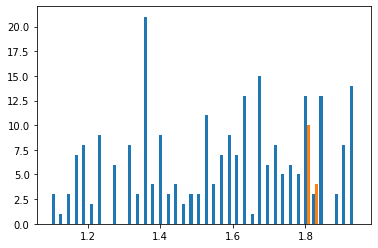

(([array([ 3.,  1.,  3.,  7.,  8.,  2.,  9.,  0.,  6.,  0.,  8.,  3., 21.,
           4.,  9.,  3.,  4.,  2.,  3.,  3., 11.,  4.,  7.,  9.,  7., 13.,
           1., 15.,  6.,  8.,  5.,  6.,  5., 13.,  3., 13.,  0.,  3.,  8.,
          14.]),
   array([ 0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,  0.,
           0.,  0.,  0.,  0.,  0.,  0.,  0., 10.,  4.,  0.,  0.,  0.,  0.,
           0.])],
  array([1.09887842, 1.11996385, 1.14104928, 1.16213472, 1.18322015,
         1.20430558, 1.22539101, 1.24647645, 1.26756188, 1.28864731,
         1.30973274, 1.33081818, 1.35190361, 1.37298904, 1.39407447,
         1.41515991, 1.43624534, 1.45733077, 1.47841621, 1.49950164,
         1.52058707, 1.5416725 , 1.56275794, 1.58384337, 1.6049288 ,
         1.62601423, 1.64709967, 1.6681851 , 1.68927053, 1.71035596,
         1.7314414 , 1.75252683, 1.77361226, 1.79469769, 1.81578313,
         1.83686856, 1.85795399,

In [20]:
plt.hist([SOH_predicho, target_test], bins=40), plt.show()

In [16]:
X_train.iloc[mas_chicos_index]

NameError: name 'X_train' is not defined

In [ ]:
print(mas_chicos_index)
print(mas_chicos)

In [ ]:
mas_chicos_index = np.array(mas_chicos_index, dtype=int)
print(target_train[mas_chicos_index])
print(target_test[300])